# This is a SMS spam detector project using machine learning

In [2]:
import numpy as np
import pandas as pd


In [3]:
data = pd.read_csv('spam.csv', encoding='latin1')


In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# 1.Data Cleaning 
# 2 EDA
# 3 Text preporcessing 
# 4 model building 
#5  Evaluation 
#6 Imporvements 
# website creation and Deployment 

Data Cleaning

In [8]:
# dropping last 3 columns 
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Reanming the columns 
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [10]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# applying label encoder to target 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# finding missing values 
data.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
data.isna().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values 
data.duplicated().sum()

np.int64(403)

In [15]:
data=data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()

np.int64(0)

2 . EDA 

In [17]:
# counting spam and ham 
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

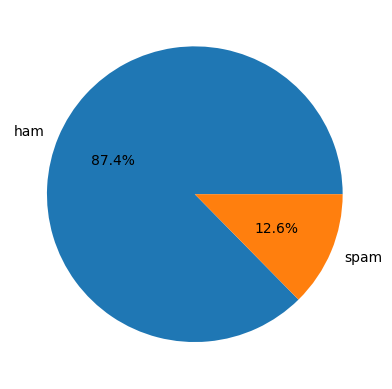

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [19]:
# data is very imbalanced 

In [20]:
pip install nltk

You should consider upgrading via the 'c:\Users\Pauras\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pauras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# now we will make 3 new columns : Word count , character count ,sentence count

data['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [23]:
# this gave us th enumber of word counts 
data['text'].apply(len)
data['num_characters']=data['text'].apply(len)

C:\Users\Pauras\AppData\Local\Temp\ipykernel_3068\1545848286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters']=data['text'].apply(len)


In [24]:
data

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [25]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pauras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Pauras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
# now fetching number of words

from nltk.tokenize import word_tokenize 
data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))


C:\Users\Pauras\AppData\Local\Temp\ipykernel_3068\585358174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [27]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# number of sentences 
data['num_sentences']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


C:\Users\Pauras\AppData\Local\Temp\ipykernel_3068\390901390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [29]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
data[data['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
data[data['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

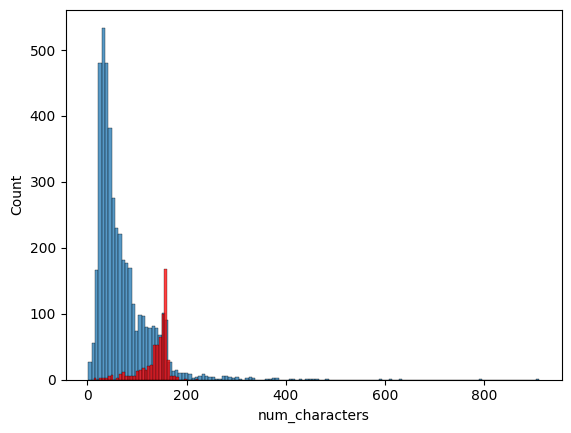

In [33]:
# plotting historgrams for spam and ham messages 
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

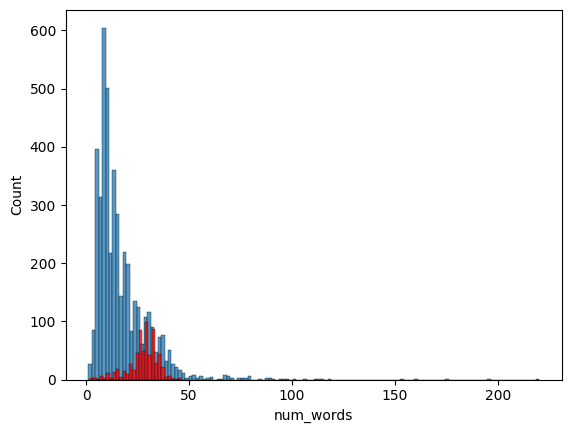

In [34]:
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

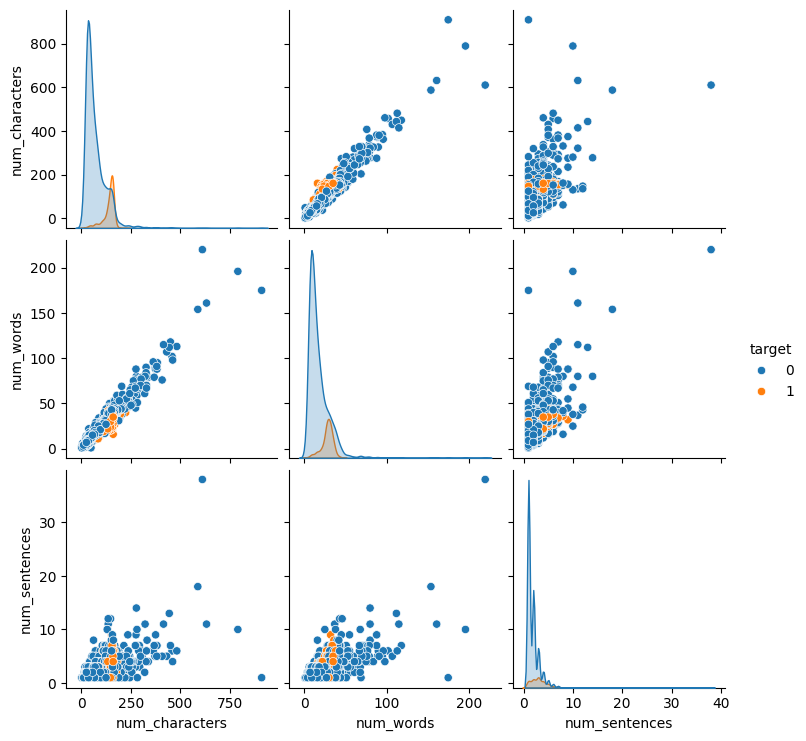

In [35]:
sns.pairplot(data,hue='target')

In [36]:
data

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: >

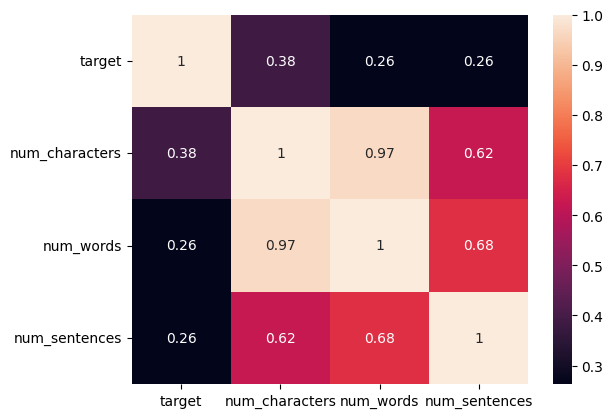

In [37]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [38]:
# This shows that there is certain correlations between the columns 

2 Data Preprocessing 
1. Lower Case 
2. Tokenization 
3. Removing speacial characters 
4. Removing stop words and punctuations 
5. Stemming / Lemmatization

In [39]:
def transfrom_text(text):
    text = text.lower()
    # text = re.sub(r'\W', ' ', text)
    # text = re.sub(r'\s+', ' ', text)
    # text = re.sub(r'^\s', '', text)
    # text = re.sub(r'\s$', '', text)
    return text

In [47]:
transfrom_text("Pauras More  100%")

['pauras', 'more', '100']

In [50]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [51]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
def transfrom_text(text):
    text = text.lower() #to lower the words 
    text=nltk.word_tokenize(text)  #tokenize the words
    y=[]
    for i in text:  # removing special characters
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [55]:

transfrom_text(" Hiii! how are you ? this is the pauras ")

['hiii', 'pauras']

In [57]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()



In [63]:
def transfrom_text(text):
    text = text.lower() #to lower the words 
    text=nltk.word_tokenize(text)  #tokenize the words
    y=[]
    for i in text:  # removing special characters
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [64]:
transfrom_text(" Hiii! how are you ? this is the pauras ? how was my presentation ?  ")

'hiii paura present'

In [66]:
data['transformed_text']=data['text'].apply(transfrom_text)

C:\Users\Pauras\AppData\Local\Temp\ipykernel_3068\4059818665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text']=data['text'].apply(transfrom_text)


In [67]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Generating Word Cloud - frequntly occuring words in both spam and ham messages 

In [70]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Pauras\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [71]:
from wordcloud import WordCloud

In [72]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [74]:
spam_wordcoloud=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=' '))

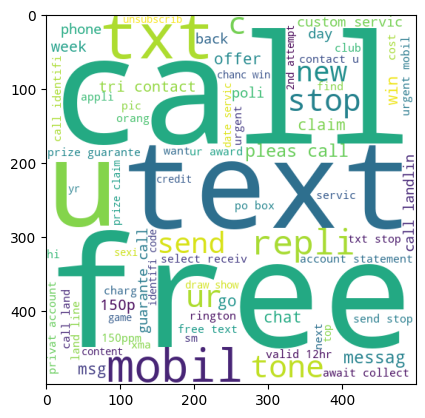

In [75]:
plt.imshow(spam_wordcoloud)

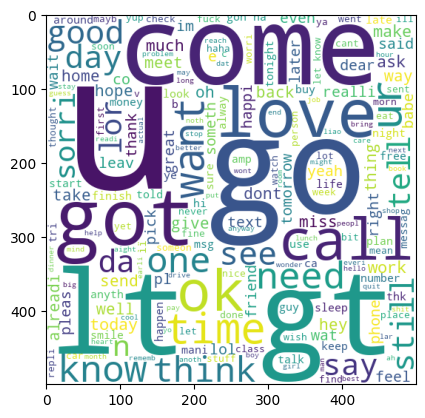

In [76]:
ham_wordcoloud=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wordcoloud)

In [89]:
# seeing top 30 words of both categories 
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].to_list():
  for words in msg.split():
    spam_corpus.append(words)



In [92]:
len(spam_corpus)

9939

In [97]:
from collections import Counter
spam_corpus=Counter(spam_corpus)
spam_corpus.most_common(30)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

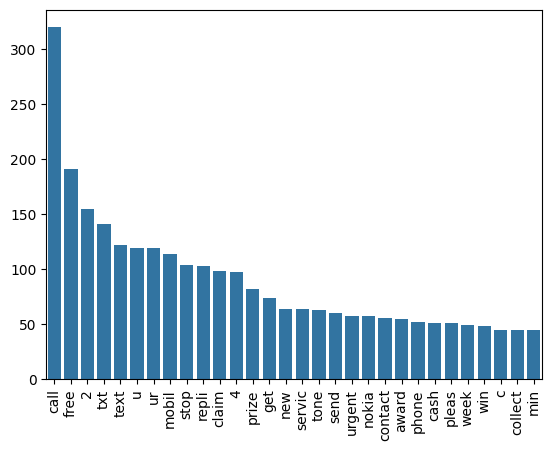

In [101]:
# plotting the occurences 

sns.barplot(x=[i[0] for i in spam_corpus.most_common(30)],y=[i[1] for i in spam_corpus.most_common(30)])
plt.xticks(rotation='vertical')

4. Model Building  

In [123]:
# using Naive Bayes Classifier 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [124]:
x=cv.fit_transform(data['transformed_text']).toarray()


In [125]:
x.shape

(5169, 6708)

In [126]:
y=data['target'].values


In [127]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [129]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [130]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [132]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [133]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [134]:
# Now we will try to use tfidf vectorized on data 
x_tfidf=tfidf.fit_transform(data['transformed_text']).toarray()


In [135]:
# Fitting each model on tfidf vectorized data

gnb.fit(x_tfidf,y)
y_pred1=gnb.predict(x_tfidf)
print(accuracy_score(y,y_pred1))
print(confusion_matrix(y,y_pred1))
print(precision_score(y,y_pred1))

0.8833430063842136
[[3913  603]
 [   0  653]]
0.5199044585987261


In [136]:
mnb.fit(x_tfidf,y)
y_pred2=mnb.predict(x_tfidf)
print(accuracy_score(y,y_pred2))  
print(confusion_matrix(y,y_pred2))
print(precision_score(y,y_pred2))

0.9822015863803444
[[4514    2]
 [  90  563]]
0.9964601769911504


In [137]:
bnb.fit(x_tfidf,y)
y_pred3=bnb.predict(x_tfidf)
print(accuracy_score(y,y_pred3))
print(confusion_matrix(y,y_pred3))
print(precision_score(y,y_pred3))

0.9872315728380732
[[4512    4]
 [  62  591]]
0.9932773109243698


In [ ]:
# trying to imporve the model 
# 1 change max features of tfidf vectorizer


In [ ]:
# exporting the model using pickle
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

: 